<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tensorflow/3_11_gradient_tape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tensorflow는 gradient를 손쉽게 update할 수 있는 자동 미분 기능을 지원한다.
자동 미분은 tf.GradientTape()을 통해 계산 과정을 기록한 뒤 gradient() 메소드로 미분 계산 가능하다.

In [3]:
# a,b의 Variable 생성
a = tf.Variable([1, 2, 3, 4, 5], dtype=tf.float32)
b = tf.Variable([10, 20, 30, 40, 50], dtype=tf.float32)

# a,b가 미분 가능한 객체인지 확인(훈련 가능한 텐서에 대해서만 gradient 계산 가능!)
print(f'a.trainable: {a.trainable} \nb.trainable: {b.trainable}')


# c = a*b
# c를 a에 대한 편미분 => b
# c를 b에 대한 편미분 => c
with tf.GradientTape() as tape:
    c = a*b
grads = tape.gradient(c, [a,b])
tf.print(f'dc/da: {grads[0]}')
tf.print(f'dc/db: {grads[1]}')

a.trainable: True 
b.trainable: True
dc/da: [10. 20. 30. 40. 50.]
dc/db: [1. 2. 3. 4. 5.]


다음은 y=wx+b 식을 계산하고 손실을 구한 뒤 자동 미분 기능을 활용하여 w, b 값을 update하여 최종 w, b 값을 찾도록 한다.

x[:5]: [-3.4758205  -0.49301633 -0.6885596  -1.2349575   1.4124402 ]
y[:5]: [-3.951641   2.0139673  1.6228808  0.5300851  5.8248806]


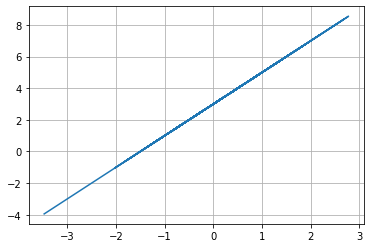

In [4]:
x = tf.Variable(np.random.normal(size=(100,)), dtype=tf.float32)
y = 2*x + 3
print(f'x[:5]: {x[:5].numpy()}\ny[:5]: {y[:5].numpy()}')


fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x.numpy(), y.numpy())
ax.grid()
plt.show()

In [ ]:
# 학습률, 최대 epoch 정의
learning_rate = 0.25
EPOCHS = 100

# w, b 초기값을 0.0으로 설정, float type 가져야 함
w = tf.Variable(0.0)
b = tf.Variable(0.0)

for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        # y_hat(예측 값)
        y_hat = w * x + b
        # 손실 계산(MSE)
        loss = tf.reduce_mean((y_hat - y)**2)
        
    # gradient computation(tape 범위 바깥에서 계산!)
    dw, db = tape.gradient(loss, [w,b])    # loss function을 w, b에 대해 각각 편미분.

    # gradient update
    w = tf.Variable(w - learning_rate * dw)
    b = tf.Variable(b - learning_rate * db)

    print(f'epoch: {epoch}, loss: {loss.numpy():.4f}, w: {w.numpy():.4f}, b: {b.numpy():.4f}')

    # Error가 0.0005보다 작으면 loop 종료
    if loss.numpy() < 0.0005:
        break

epoch: 0, loss: 12.5617, w: 0.9488, b: 1.4611
epoch: 1, loss: 3.3553, w: 1.4482, b: 2.2101
epoch: 2, loss: 0.8967, w: 1.7107, b: 2.5943
epoch: 3, loss: 0.2397, w: 1.8485, b: 2.7915
epoch: 4, loss: 0.0641, w: 1.9207, b: 2.8928
epoch: 5, loss: 0.0172, w: 1.9586, b: 2.9449
epoch: 6, loss: 0.0046, w: 1.9784, b: 2.9716
epoch: 7, loss: 0.0012, w: 1.9887, b: 2.9854
epoch: 8, loss: 0.0003, w: 1.9941, b: 2.9925


y=2x+3에서의 2,3에 각각 근사한 w,b값을 위에서 찾음!